In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("crop_yield_prediction.txt")  # replace with actual file path

print("Initial Shape:", df.shape)

Initial Shape: (10, 5)


In [3]:
df = df.dropna()
print("After Dropping NA:", df.shape)

After Dropping NA: (10, 5)


In [4]:
df = pd.get_dummies(df)


In [5]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [8]:
# Model: Gradient Boosting
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [9]:
# Prediction
y_pred = model.predict(X_test)

In [10]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")


R² Score: 0.7487
MSE: 0.0101


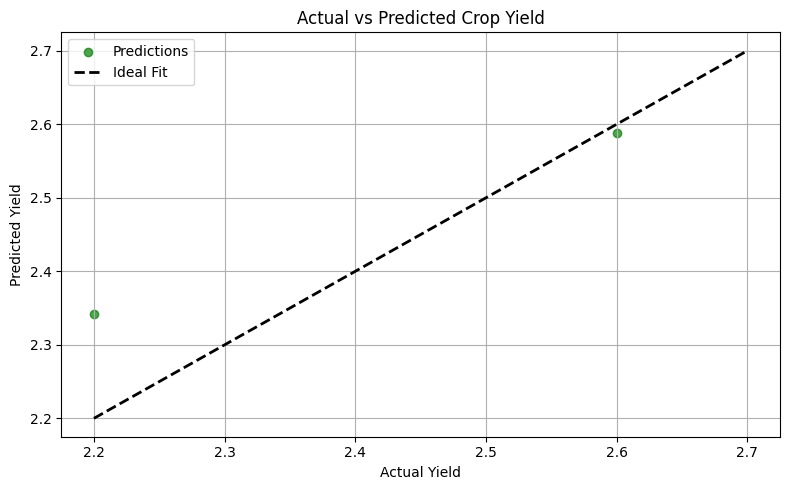

In [11]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
